In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import datasets, metrics, neighbors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn import svm

Text(0, 0.5, 'y-label')

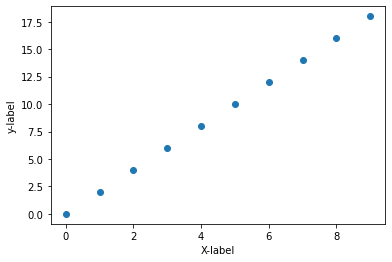

In [2]:
x = [i for i in range(10)]
y = [2*n for n in range(10)]

plt.scatter(x, y)
plt.xlabel('X-label')
plt.ylabel('y-label')

## Car data

In [3]:
car_df = pd.read_csv('car.data')
car_df.columns

Index(['vhigh', 'vhigh.1', '2', '2.1', 'small', 'low', 'unacc'], dtype='object')

In [4]:
car_df.rename({
    'vhigh': 'buying',
    'vhigh.1': 'maint',
    '2': 'doors',
    '2.1':'persons',
    'small': 'lug_boot',
    'low': 'safety',
    'unacc': 'class'
}, inplace=True, axis=1)

In [5]:
car_df.head(3)

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc


# get the feature and label

In [6]:
X = car_df[['buying', 'maint', 'safety']].values
y = car_df['class'].values
X

array([['vhigh', 'vhigh', 'med'],
       ['vhigh', 'vhigh', 'high'],
       ['vhigh', 'vhigh', 'low'],
       ...,
       ['low', 'low', 'low'],
       ['low', 'low', 'med'],
       ['low', 'low', 'high']], dtype=object)

# Encoded the attribute data

In [7]:
lbEncoder = LabelEncoder()

# encode X
for item in range(len(X[0])):
    X[:, item] = lbEncoder.fit_transform(X[:, item])

# encode y
car_df.replace({'class': {'unacc': 0, 'acc': 1, 'good': 2, 'vgood': 3}}, inplace=True)
y = car_df['class']

# split the data

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, y_train.shape)

(1381, 3) (1381,)


# Model - train-test-predict

In [9]:
knn_model = neighbors.KNeighborsClassifier(n_neighbors=25, weights='uniform')
knn_model.fit(X_train, y_train)
xtestPred = knn_model.predict(X_test)
print('X-test-prediction >>> :- ', xtestPred)

X-test-prediction >>> :-  [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 3 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 3 0 0 2 2 0 1 0 0 0 3 0 0 0 0 0 0 0
 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0
 1 0 0 0 0 0 2 0 2 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 1 0 1
 0 1 0 1 2 0 1 0 0 1 0 0 0 0 0 3 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 2 0 0 1 0 0 0 0 1 1 0 1 1 0 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 2 0 0 0 0 1 0 0 0 0
 0 0 3 0 0 0 0 1 0 0 0 0 1]


In [10]:
XTestAcc = metrics.accuracy_score(y_test, xtestPred)
print('X_test_Accuracy :- ', XTestAcc)

X_test_Accuracy :-  0.7312138728323699
